<a href="https://colab.research.google.com/github/Simu-Sultana/Contact-Tracing-using-DBSCAN/blob/main/Contact_Tracing_using_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as anp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.cluster import DBSCAN

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
df = pd.read_json("/content/drive/MyDrive/Dataset/livedata.json")
print(df.head())

      id           timestamp   latitude  longitude
0  David 2020-07-04 15:35:30  13.148953  77.593651
1  David 2020-07-04 16:35:30  13.222397  77.652828
2  Frank 2020-07-04 14:35:30  13.236507  77.693792
3  Carol 2020-07-04 21:35:30  13.163716  77.562842
4   Ivan 2020-07-04 22:35:30  13.232095  77.580273


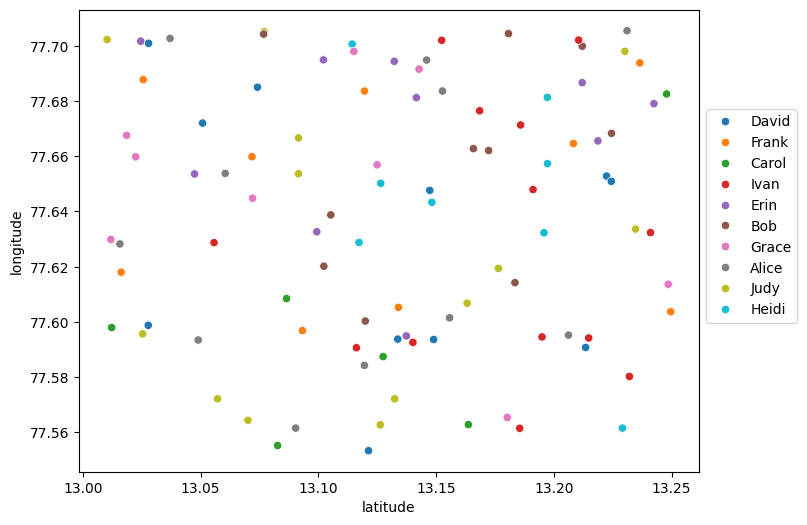

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="latitude", y="longitude", data=df, hue="id")
plt.legend(bbox_to_anchor = [1, 0.8])
plt.show()

In [24]:
import pandas as pd
from sklearn.cluster import DBSCAN
from math import radians
# convert degrees to radians for latitude and longitude
df = pd.read_json("/content/drive/MyDrive/Dataset/livedata.json")
df['latitude'] = df['latitude'].apply(radians)
df['longitude'] = df['longitude'].apply(radians)

def get_infected_names(input_name):
    epsilon = 0.0018288 # a radial distance of 6 feet in kilometers

    # use haversine distance with radians data
    model = DBSCAN(eps=epsilon, min_samples=3, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()

    input_name_clusters = []
    for i in range(len(df)):
        if df['id'][i] == input_name:
            if df['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(df['cluster'][i])

    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass

    return infected_names

# test with input name "David"
print(get_infected_names("David"))

['Frank', 'Carol', 'Ivan', 'Erin', 'Bob', 'Grace', 'Alice', 'Judy', 'Heidi']
